In [94]:
import yfinance as yf

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.base import clone

In [95]:
df_apple_to_csv = yf.download("AAPL", start="2020-01-01", end="2025-08-13")
df_microsoft_to_csv = yf.download("MSFT", start="2020-01-01", end="2025-08-13")
df_amazon_to_csv = yf.download("AMZN", start="2020-01-01", end="2025-08-13")


apple_path = 'datasets/apple.csv'
microsoft_path = 'datasets/microsoft.csv'
amazon_path = 'datasets/amazon.csv'

df_apple_to_csv.to_csv(apple_path)
df_microsoft_to_csv.to_csv(microsoft_path)
df_amazon_to_csv.to_csv(amazon_path)

df_apple = pd.read_csv(apple_path)
df_microsoft = pd.read_csv(microsoft_path)
df_amazon = pd.read_csv(amazon_path)

C:\Users\acer\AppData\Local\Temp\ipykernel_4280\1102566560.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_apple_to_csv = yf.download("AAPL", start="2020-01-01", end="2025-08-13")
[*********************100%***********************]  1 of 1 completed
C:\Users\acer\AppData\Local\Temp\ipykernel_4280\1102566560.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_microsoft_to_csv = yf.download("MSFT", start="2020-01-01", end="2025-08-13")
[*********************100%***********************]  1 of 1 completed
C:\Users\acer\AppData\Local\Temp\ipykernel_4280\1102566560.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_amazon_to_csv = yf.download("AMZN", start="2020-01-01", end="2025-08-13")
[*********************100%***********************]  1 of 1 completed


In [96]:
df_apple.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
1,Date,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,72.53850555419922,72.59888386623527,71.29229630932706,71.54588227171874,135480400
3,2020-01-03,71.83329010009766,72.59405542623057,71.60868452797844,71.76566667933918,146322800
4,2020-01-06,72.40568542480469,72.4443284378041,70.70301958367426,70.9541954829699,118387200


In [97]:
df_microsoft.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
1,Date,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,153.04229736328125,153.14710838701015,150.86034091881393,151.2891080017366,22622100
3,2020-01-03,151.13665771484375,152.4039130274651,150.60307959140601,150.8508226765117,21116200
4,2020-01-06,151.52728271484375,151.59398723405667,149.12616718464912,149.66928270769137,20813700


In [98]:
df_amazon.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
1,Date,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,94.90049743652344,94.90049743652344,93.2074966430664,93.75,80580000
3,2020-01-03,93.74849700927734,94.30999755859375,93.2249984741211,93.2249984741211,75288000
4,2020-01-06,95.14399719238281,95.18450164794922,93.0,93.0,81236000


In [99]:
df_apple['Date'] = df_apple['Price']
df_apple = df_apple.drop(index=[0,1], columns='Price')

df_microsoft['Date'] = df_microsoft['Price']
df_microsoft = df_microsoft.drop(index=[0,1], columns='Price')

df_amazon['Date'] = df_amazon['Price']
df_amazon = df_amazon.drop(index=[0,1], columns='Price')

In [100]:
df_apple.head()

,Close,High,Low,Open,Volume,Date
2,72.53850555419922,72.59888386623527,71.29229630932706,71.54588227171874,135480400,2020-01-02
3,71.83329010009766,72.59405542623057,71.60868452797844,71.76566667933918,146322800,2020-01-03
4,72.40568542480469,72.4443284378041,70.70301958367426,70.9541954829699,118387200,2020-01-06
5,72.06514739990234,72.67134068922641,71.84536944211234,72.41533721540509,108872000,2020-01-07
6,73.22440338134766,73.5262949460089,71.76807876823776,71.76807876823776,132079200,2020-01-08


In [101]:
df_microsoft.head()

,Close,High,Low,Open,Volume,Date
2,153.04229736328125,153.14710838701015,150.86034091881393,151.2891080017366,22622100,2020-01-02
3,151.13665771484375,152.4039130274651,150.60307959140601,150.8508226765117,21116200,2020-01-03
4,151.52728271484375,151.59398723405667,149.12616718464912,149.66928270769137,20813700,2020-01-06
5,150.14569091796875,152.13708538758584,149.89796243459426,151.8036064144559,21634100,2020-01-07
6,152.5373077392578,153.21381792157746,150.49826874289445,151.43203046001807,27746500,2020-01-08


In [102]:
df_amazon.head()

,Close,High,Low,Open,Volume,Date
2,94.90049743652344,94.90049743652344,93.2074966430664,93.75,80580000,2020-01-02
3,93.74849700927734,94.30999755859375,93.2249984741211,93.2249984741211,75288000,2020-01-03
4,95.14399719238281,95.18450164794922,93.0,93.0,81236000,2020-01-06
5,95.34300231933594,95.69450378417969,94.60199737548828,95.2249984741211,80898000,2020-01-07
6,94.59850311279297,95.55000305175781,94.3219985961914,94.9020004272461,70160000,2020-01-08


In [103]:
df_apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1410 entries, 2 to 1411
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1410 non-null   object
 1   High    1410 non-null   object
 2   Low     1410 non-null   object
 3   Open    1410 non-null   object
 4   Volume  1410 non-null   object
 5   Date    1410 non-null   object
dtypes: object(6)
memory usage: 66.2+ KB


In [104]:
df_apple.describe()

,Close,High,Low,Open,Volume,Date
count,1410,1410,1410,1410,1410,1410
unique,1394,1410,1410,1410,1408,1410
top,139.26516723632812,230.8000030517578,227.07000732421875,228.00999450683594,90956700,2025-08-12
freq,2,1,1,1,2,1


In [105]:
df_apple.isna().sum()

Close     0
High      0
Low       0
Open      0
Volume    0
Date      0
dtype: int64

In [106]:
df_apple['Close'] = df_apple['Close'].astype(float)
df_apple['High'] = df_apple['High'].astype(float)
df_apple['Low'] = df_apple['Low'].astype(float)
df_apple['Open'] = df_apple['Open'].astype(float)
df_apple['Volume'] = df_apple['Volume'].astype(float)
df_apple['Date'] = pd.to_datetime(df_apple['Date'])

In [107]:
df_apple.describe()

,Close,High,Low,Open,Volume,Date
count,1410.000000,1410.000000,1410.000000,1410.000000,1.410000e+03,1410
mean,158.653070,160.302882,156.833868,158.492042,8.705896e+07,2022-10-20 08:51:03.829787136
min,54.316933,55.316751,51.469998,55.215075,2.323470e+07,2020-01-02 00:00:00
25%,129.986839,131.399736,128.380758,129.910640,5.286620e+07,2021-05-26 06:00:00
50%,158.771339,160.542168,156.498356,158.399768,7.325130e+07,2022-10-18 12:00:00
75%,188.764469,189.984063,187.366191,188.488593,1.033882e+08,2024-03-14 18:00:00
max,258.103729,259.179926,256.718662,257.276679,4.265100e+08,2025-08-12 00:00:00
std,44.575531,44.838236,44.244234,44.524546,5.190117e+07,NaN


In [108]:
df_apple[df_apple['Close'] < 0].head()

,Close,High,Low,Open,Volume,Date


In [109]:
#AAPL FEATURE ENGINEERING

#CALCULATING RSI VALUE FOR TO CHECK MOMENTUM
window = 14

df_apple['Price Change'] = df_apple['Close'].diff().fillna(0)

df_apple['Gain'] = df_apple.loc[df_apple['Price Change'] > 0, 'Price Change']
df_apple['Loss'] = -df_apple.loc[df_apple['Price Change'] < 0, 'Price Change']

df_apple['Gain'] = df_apple['Gain'].fillna(0)
df_apple['Loss'] = df_apple['Loss'].fillna(0)

df_apple['Average Gain'] = df_apple['Gain'].rolling(window=window).mean().fillna(0)
df_apple['Average Loss'] = df_apple['Loss'].rolling(window=window).mean().fillna(0)

#df_apple = df_apple.drop(index=list(range(2,15)))

df_apple['RS'] = df_apple['Average Gain'] / df_apple['Average Loss']

df_apple['RSI'] = 100 - (100 / (1 + df_apple['RS']))

# df_apple['Target Close'] = df_apple['Close'].shift(-1) 

df_apple.head()
# df_apple['Average Gain']
# df_apple['Average Loss']
# df_apple['RS']
# df_apple['RSI']

,Close,High,Low,Open,Volume,Date,Price Change,Gain,Loss,Average Gain,Average Loss,RS,RSI
2,72.538506,72.598884,71.292296,71.545882,135480400.0,2020-01-02,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN
3,71.833290,72.594055,71.608685,71.765667,146322800.0,2020-01-03,-0.705215,0.000000,0.705215,0.0,0.0,NaN,NaN
4,72.405685,72.444328,70.703020,70.954195,118387200.0,2020-01-06,0.572395,0.572395,0.000000,0.0,0.0,NaN,NaN
5,72.065147,72.671341,71.845369,72.415337,108872000.0,2020-01-07,-0.340538,0.000000,0.340538,0.0,0.0,NaN,NaN
6,73.224403,73.526295,71.768079,71.768079,132079200.0,2020-01-08,1.159256,1.159256,0.000000,0.0,0.0,NaN,NaN


In [110]:
df_apple = df_apple.drop(columns=['Gain', 'Loss'])

In [111]:
#FEATURE ENGINEERING

#CALCULATING MACD VALUE FOR VOLATILITY
short_period = 12
long_period = 26
signal_line_period = 9

# df_apple['Short EMA'] = (df_apple['Close'] * (2 / (short_period + 1))) + ( (1 - (2 / (short_period + 1))) * df_apple['Close'].shift(1))
# df_apple['Long EMA'] = (df_apple['Close'] * (2 / (long_period + 1))) + ( (1 - (2 / (long_period + 1))) * df_apple['Close'].shift(1))

df_apple['Short EMA'] = df_apple['Close'].ewm(span=short_period,adjust=False).mean()
df_apple['Long EMA'] = df_apple['Close'].ewm(span=long_period, adjust=False).mean()

df_apple['MACD'] = df_apple['Short EMA'] - df_apple['Long EMA']

# df_apple['Signal Line'] = (df_apple['MACD'] * (2 / (signal_line_period + 1))) + ( (1 - (2 / (signal_line_period + 1))) * df_apple['MACD'].shift(1))
df_apple['Signal Line'] = df_apple['MACD'].ewm(span=signal_line_period, adjust=False).mean()

df_apple['MACD Histogram'] = df_apple['MACD'] - df_apple['Signal Line']


In [112]:
df_apple.head(n=27)     

,Close,High,Low,Open,Volume,Date,Price Change,Average Gain,Average Loss,RS,RSI,Short EMA,Long EMA,MACD,Signal Line,MACD Histogram
2,72.538506,72.598884,71.292296,71.545882,135480400.0,2020-01-02,0.000000,0.000000,0.000000,NaN,NaN,72.538506,72.538506,0.000000,0.000000,0.000000
3,71.833290,72.594055,71.608685,71.765667,146322800.0,2020-01-03,-0.705215,0.000000,0.000000,NaN,NaN,72.430011,72.486267,-0.056257,-0.011251,-0.045005
4,72.405685,72.444328,70.703020,70.954195,118387200.0,2020-01-06,0.572395,0.000000,0.000000,NaN,NaN,72.426268,72.480298,-0.054030,-0.019807,-0.034223
5,72.065147,72.671341,71.845369,72.415337,108872000.0,2020-01-07,-0.340538,0.000000,0.000000,NaN,NaN,72.370711,72.449546,-0.078835,-0.031613,-0.047222
6,73.224403,73.526295,71.768079,71.768079,132079200.0,2020-01-08,1.159256,0.000000,0.000000,NaN,NaN,72.502049,72.506943,-0.004895,-0.026269,0.021374
7,74.779762,74.972970,73.951373,74.202542,170108400.0,2020-01-09,1.555359,0.000000,0.000000,NaN,NaN,72.852466,72.675300,0.177166,0.014418,0.162748
8,74.948845,75.513993,74.446500,75.014058,140644800.0,2020-01-10,0.169083,0.000000,0.000000,NaN,NaN,73.174986,72.843711,0.331275,0.077789,0.253486
9,76.550034,76.576604,75.146842,75.265189,121532000.0,2020-01-13,1.601189,0.000000,0.000000,NaN,NaN,73.694224,73.118253,0.575971,0.177426,0.398545
10,75.516365,76.697368,75.393198,76.487253,161954400.0,2020-01-14,-1.033669,0.000000,0.000000,NaN,NaN,73.974553,73.295891,0.678662,0.277673,0.400989
11,75.192741,76.197437,74.760431,75.315916,121923600.0,2020-01-15,-0.323624,0.000000,0.000000,NaN,NaN,74.161967,73.436399,0.725568,0.367252,0.358316


In [113]:
print(df_apple.shape)
df_apple.info()

(1410, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1410 entries, 2 to 1411
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Close           1410 non-null   float64       
 1   High            1410 non-null   float64       
 2   Low             1410 non-null   float64       
 3   Open            1410 non-null   float64       
 4   Volume          1410 non-null   float64       
 5   Date            1410 non-null   datetime64[ns]
 6   Price Change    1410 non-null   float64       
 7   Average Gain    1410 non-null   float64       
 8   Average Loss    1410 non-null   float64       
 9   RS              1397 non-null   float64       
 10  RSI             1397 non-null   float64       
 11  Short EMA       1410 non-null   float64       
 12  Long EMA        1410 non-null   float64       
 13  MACD            1410 non-null   float64       
 14  Signal Line     1410 non-null   float64      

In [114]:
df_apple = df_apple.dropna()

In [115]:
df_apple.head()

,Close,High,Low,Open,Volume,Date,Price Change,Average Gain,Average Loss,RS,RSI,Short EMA,Long EMA,MACD,Signal Line,MACD Histogram
15,76.728767,77.281827,76.634574,76.941293,101832400.0,2020-01-22,0.272911,0.508211,0.208906,2.432720,70.868581,75.349464,74.270920,1.078545,0.738870,0.339674
16,77.098297,77.177993,76.233675,76.781915,104472000.0,2020-01-23,0.369530,0.534606,0.208906,2.559068,71.902758,75.618516,74.480355,1.138161,0.818728,0.319432
17,76.876091,78.088485,76.685293,77.344627,146537600.0,2020-01-24,-0.222206,0.534606,0.174406,3.065299,75.401563,75.811989,74.657817,1.154172,0.885817,0.268355
18,74.615532,75.296594,73.632571,74.883608,161940000.0,2020-01-27,-2.260559,0.493720,0.335874,1.469956,59.513451,75.627918,74.654685,0.973234,0.903300,0.069933
19,76.726357,76.897829,75.398033,75.497055,162234000.0,2020-01-28,2.110825,0.644494,0.311550,2.068667,67.412566,75.796909,74.808142,0.988767,0.920394,0.068373


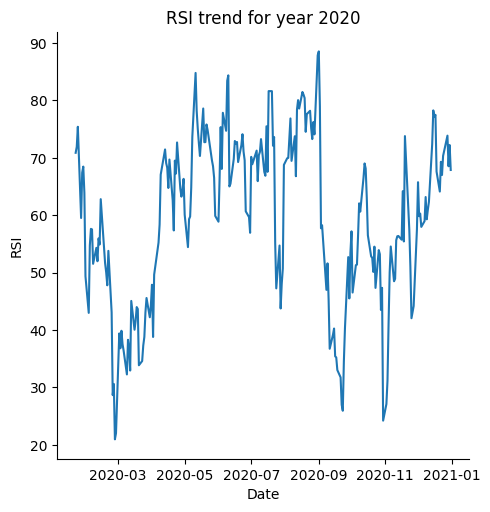

<Figure size 2000x1000 with 0 Axes>

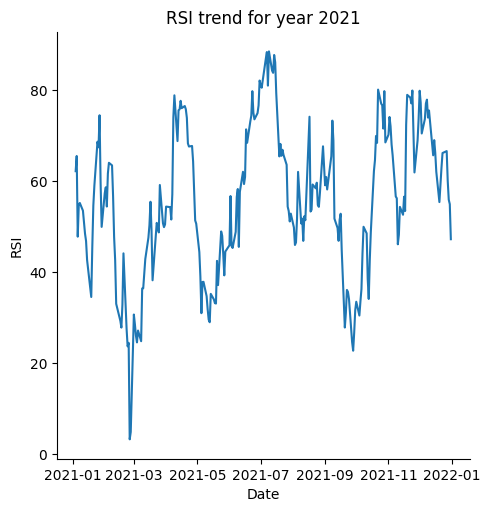

<Figure size 2000x1000 with 0 Axes>

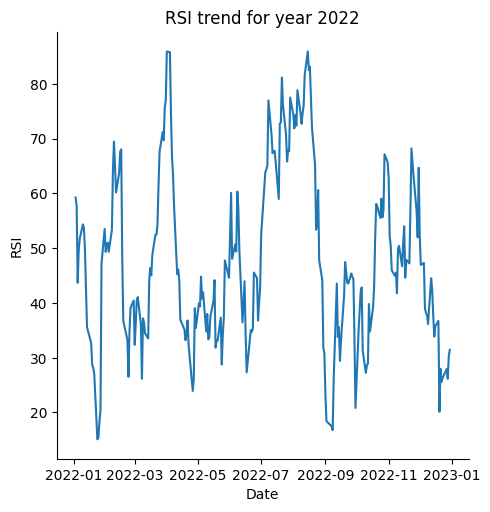

<Figure size 2000x1000 with 0 Axes>

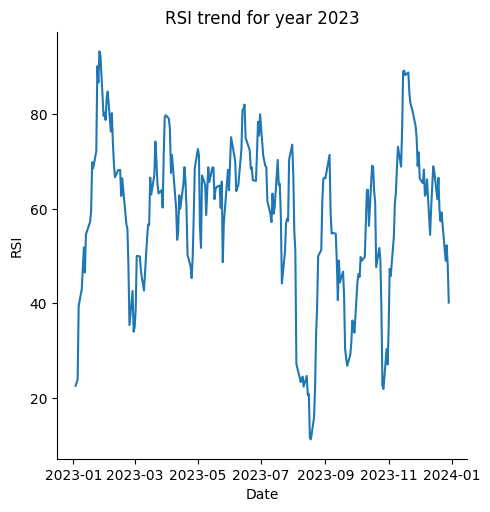

<Figure size 2000x1000 with 0 Axes>

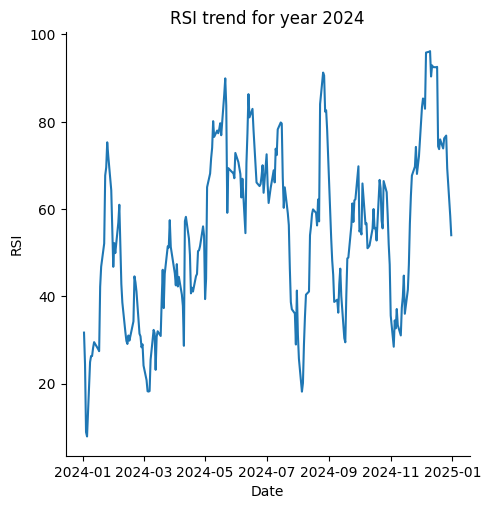

<Figure size 2000x1000 with 0 Axes>

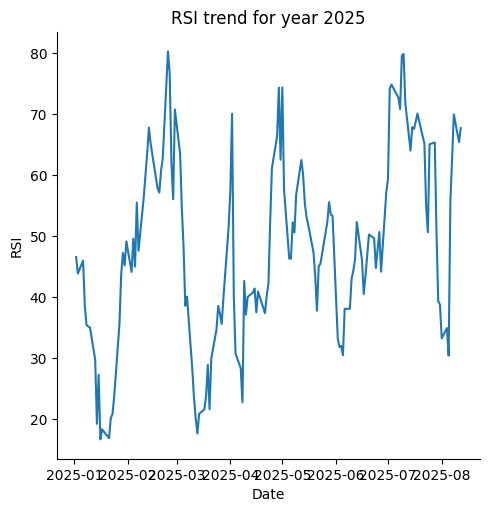

<Figure size 2000x1000 with 0 Axes>

In [139]:
# sns.relplot(data=df_apple.loc[(df_apple['Date'].dt.year >= 2023) & (df_apple['Date'].dt.year < 2025), :], x='Date', y='RSI', kind='line')
# plt.show()

df_apple['Year'] = df_apple['Date'].dt.year

years = list(range(2020,2026))

for year in years:
    sns.relplot(data=df_apple.loc[df_apple['Year'] == year], x='Date', y='RSI', kind='line')
    plt.title(f'RSI trend for year {year}')
    plt.figure(figsize=(20,10))
    plt.show()